In [83]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

#loading the data
path_data = 'data_BAMB/behaviour_EEG_syn/'

# name_file = 'sub016_sess001_behav_syn'
# mat = scipy.io.loadmat(str(path_data) + str(name_file) + '.mat')
# mat = scipy.io.loadmat(str(name_file) + '.mat')

subject = 16
sess = 1
mat = loadmat(str(path_data) + '/sub' + str(subject).zfill(3) + '_sess' + str(sess).zfill(3) +\
                       '_behav_syn.mat')
print(mat.keys())

In [29]:
# mat['respMat'][0,0].shape

(80, 8)

In [129]:
trigger_vals = mat['B'][0,0][12][0,:]
trigger_vals = np.array([el[:,0] for el in trigger_vals])
print(trigger_vals.shape)

coherence_frame = mat['B'][0,0][14][0,:]
coherence_frame = np.array([el[:,0] for el in coherence_frame])
print(coherence_frame.shape)

(4, 30013)
(4, 30013)


In [122]:
for i in range(4):
    print(np.unique(trigger_vals[i,:]))
#     plt.plot(coherence_frame[i])
#     plt.plot(trigger_vals[i,:])
#     plt.xlim(0,100)
#     plt.show()

[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]
[  0  11  12  13  14  15  16  17  18  19  23  24  30  40  50 102 103 104
 105 106 130 140 150 201 202 203 205 206 210]


In [118]:
print(trigger_vals.shape)
print(trigger_vals.shape[1])
resp = np.zeros((4,trigger_vals.shape[1]))
print(resp.shape)

for cond in range(4):
    for trigger_value_left in [205,206]:
        resp[cond,trigger_vals[cond,:] == trigger_value_left] = -1
    for trigger_value_right in [201,202]:
        resp[cond,trigger_vals[cond,:] == trigger_value_right] = 1
print(resp)

(4, 30013)
30013
(4, 30013)
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [124]:
for cond in range(4):
    print("-------- cond",cond,"-------------")
    for value in [-1,0,1]:
        print("response",value,"happens", np.sum(resp[cond,:] == value),"times")

-------- cond 0 -------------
response -1 happens 14 times
response 0 happens 29982 times
response 1 happens 17 times
-------- cond 1 -------------
response -1 happens 8 times
response 0 happens 30001 times
response 1 happens 4 times
-------- cond 2 -------------
response -1 happens 25 times
response 0 happens 29964 times
response 1 happens 24 times
-------- cond 3 -------------
response -1 happens 13 times
response 0 happens 29991 times
response 1 happens 9 times


In [138]:
X_all_cond = []
for cond in range(4):
    X = []
    nframes = 500 #number of frames taken (to go back in time)
    for i in range(nframes):
        beginning = 500-i
        end = coherence_frame.shape[1] - i
        X.append(coherence_frame[cond,beginning:end])
    X = np.array(X)
    print(X.shape)
    
    X_all_cond.append(X)
    
X_all_cond = np.array(X_all_cond)
print(X_all_cond.shape)

(500, 29513)
(500, 29513)
(500, 29513)
(500, 29513)
(4, 500, 29513)


(29513, 500) (29513,)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(3, 500)


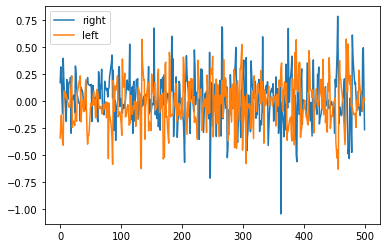

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


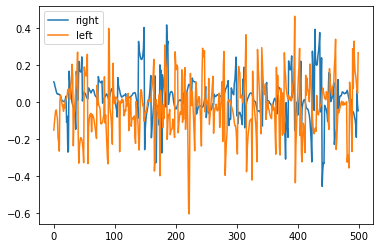

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


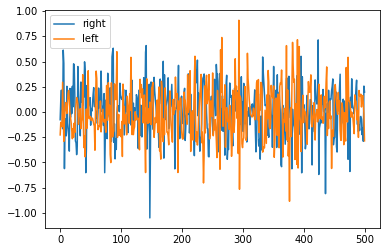

(29513, 500) (29513,)
(3, 500)


/home/vincent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


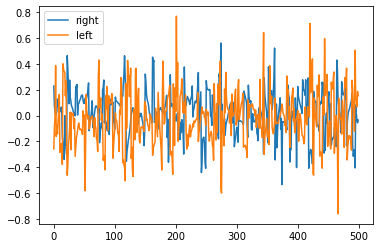

In [152]:
#logistic regression
from sklearn.linear_model import LogisticRegression

weights_fitted = []
for cond in range(4):
    X = X_all_cond[cond].T
    y = resp[cond][nframes:]
    print(X.shape,y.shape)
    
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
    weights = clf.coef_
    print(weights.shape)
    weights_right = weights[2,:] 
    weights_left = weights[0,:]
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
    plt.show()
#     clf.predict(X[:2, :])
#     clf.predict_proba(X[:2, :]) 
#     clf.score(X, y)
    
    weights_fitted.append(weights)
weights_fitted = np.array(weights_fitted)

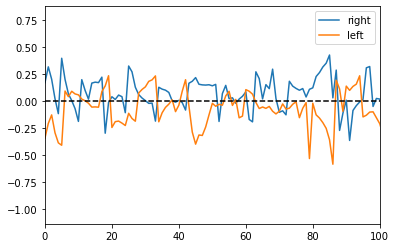

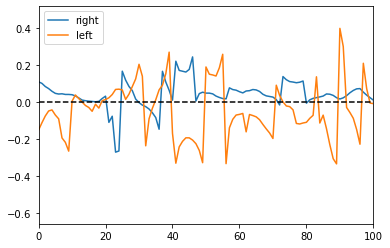

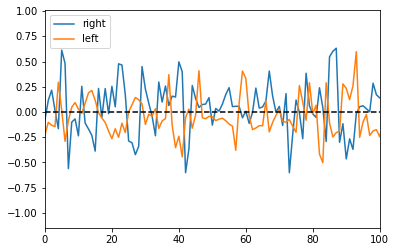

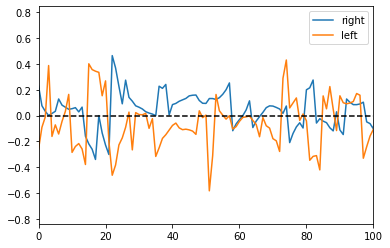

In [154]:
for cond in range(4):
    weights = weights_fitted[cond,:]
    
    weights_right = weights[2,:] 
    weights_left = weights[0,:]
    plt.plot(weights_right, label='right')
    plt.plot(weights_left, label='left')
    plt.legend()
    plt.xlim(0,100)
    plt.axhline(y=0,color='black',linestyle='--')
    plt.show()

In [ ]:
#todo: downsample